### Importing required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tools.eval_measures as em
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from IPython.display import display
from pylab import rcParams
from datetime import  datetime,timedelta
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

### Reading time series data 

In [3]:
LOCAL_DATA_PATH = os.path.join(os.path.abspath('./../../'), 'data/TS_data/')
LOCAL_DATA_PATH

'/Users/vidyadharbendre/nn_workspace/learn_neural_network_using_examples/data/TS_data/'

In [5]:
df = pd.read_csv(LOCAL_DATA_PATH+'oil.csv',parse_dates=['date'],dayfirst=True)
df.head()

,date,value
0,2010-01-01,8.2
1,2010-02-01,8.4
2,2010-03-01,8.5
3,2010-04-01,8.7
4,2010-05-01,8.7


In [6]:
df.tail()

,date,value
87,2017-04-01,9.98
88,2017-05-01,10.05
89,2017-06-01,10.06
90,2017-07-01,10.10
91,2017-08-01,10.14


In [7]:
df=df.set_index('date')

### Plotting time series

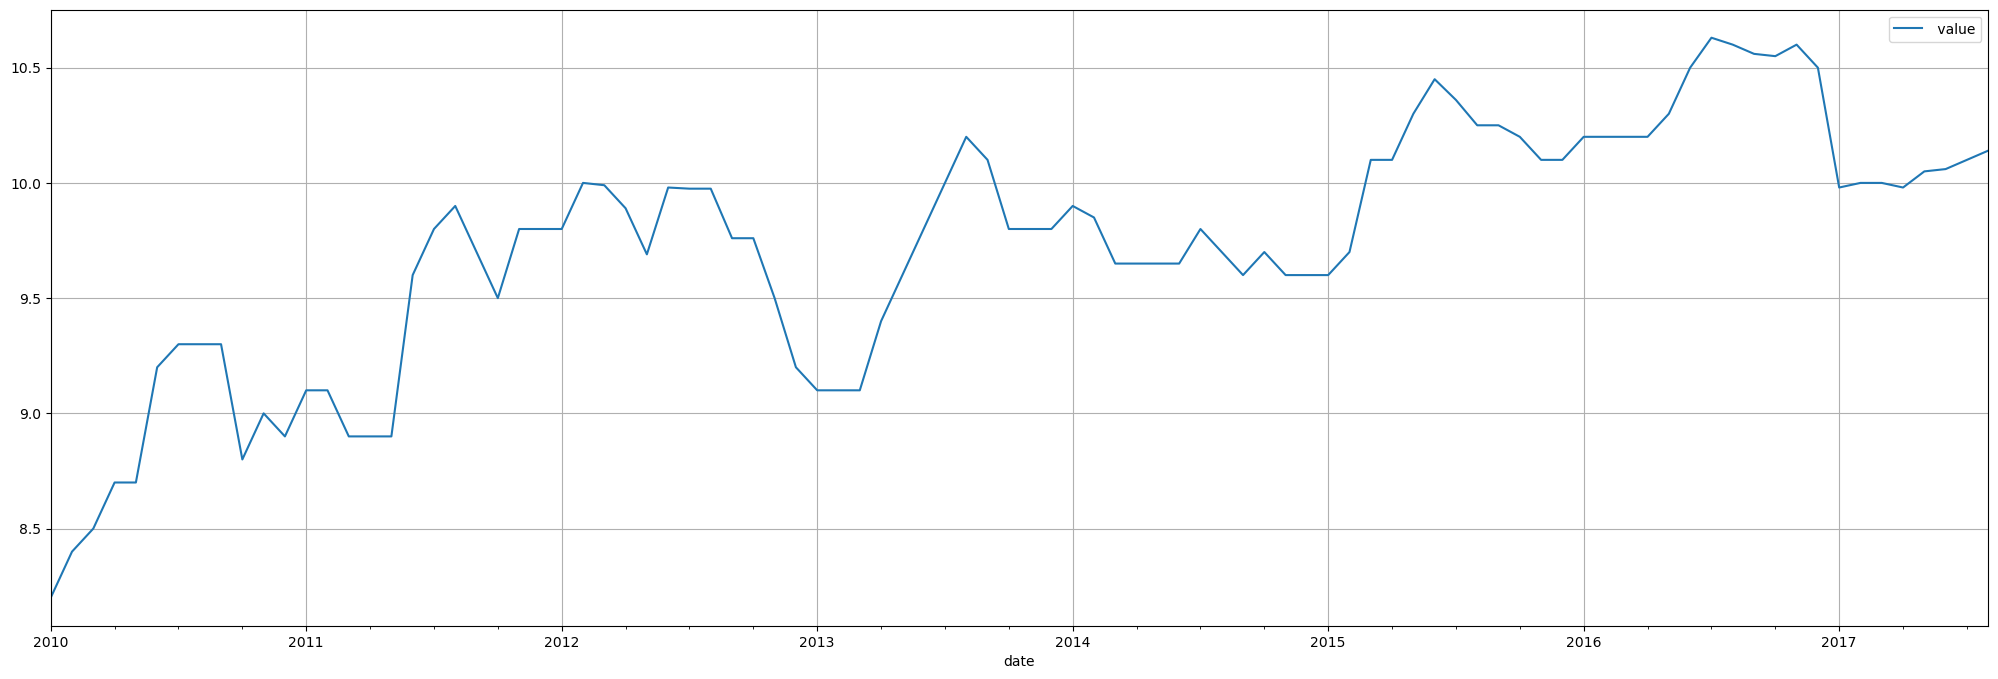

In [8]:
rcParams['figure.figsize'] = 25,8
df.plot(grid=True);

## Spliting time series data

### Most recent observations will be used to test the model while remaining series will be used to train the model

### if time series has seasonality, then test data must include atleast one seasonal period. 

In [6]:
train_end=datetime(2017,1,1)
test_end=datetime(2017,8,1)

In [7]:
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

In [8]:
print('Train')
display(train)
print('Test')
display(test)

Train


,value
date,
2010-01-01,8.20
2010-02-01,8.40
2010-03-01,8.50
2010-04-01,8.70
2010-05-01,8.70
...,...
2016-09-01,10.56
2016-10-01,10.55
2016-11-01,10.60


Test


,value
date,
2017-02-01,10.00
2017-03-01,10.00
2017-04-01,9.98
2017-05-01,10.05
2017-06-01,10.06
2017-07-01,10.10
2017-08-01,10.14


# Simple Exponential Smoothing

In [9]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

#### lets train the model for different 𝛼 values

In [10]:
model_SES_fit1 = model_SES.fit(optimized=True)

#### Predicting forecast using trained models

In [11]:
SES_predict1 = model_SES_fit1.forecast(steps=len(test))

#### Plotting time searies and forecasts 

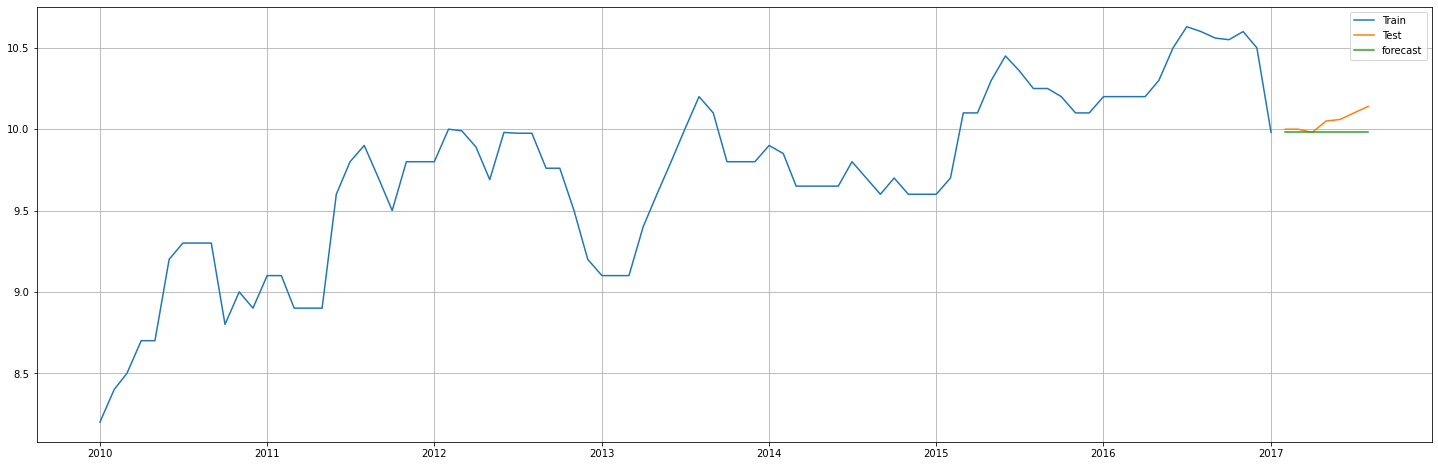

In [12]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict1,label='forecast')

plt.legend(loc='best')
plt.grid()

#### Root Mean Square Error for simple forecasting model

In [13]:
mean_squared_error(test.values,SES_predict1.values,squared=False)

0.08627198909455018

#### Defining Mean Absolute Percentage error

In [14]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

#### Mean Absolute Percentage Error for simple forecasting model

In [15]:
MAPE(test.values,SES_predict1.values)

0.6653962483819654

# END